# Walmart Business Case

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Problem Statement:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wget

In [2]:
df_original = pd.read_csv('walmart_data.csv')

In [3]:
df_original

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
print(df_original.shape)

print('Number of Rows: ', df_original.shape[0])
print('Number of Columns: ', df_original.shape[1])

(550068, 10)
Number of Rows:  550068
Number of Columns:  10


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### Changing the Data Type of categorical columns (Occupation, Marital_tatus, Product_Category) to object

In [6]:
columns = ['Occupation', 'Marital_Status', 'Product_Category']

df_original[columns] = df_original[columns].astype('object')

In [7]:
df_original.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


## Non-Graphical Analysis

In [8]:
df_original.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

1. Total number of Users: 5891
2. Total number of  Products: 3631
3. Total number of Product Categories: 20

#### Below is the count of all the categorical variables in the DataSet

In [9]:
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

df_original[categorical_columns].melt().groupby(['variable', 'value'])[['value']].count()

value
variable                   value        
Age                        0-17    15102
                           18-25   99660
                           26-35  219587
                           36-45  110013
                           46-50   45701
                           51-55   38501
                           55+     21504
City_Category              A      147720
                           B      231173
                           C      171175
Gender                     F      135809
                           M      414259
Marital_Status             0      324731
                           1      225337
Occupation                 0       69638
                           1       47426
                           2       26588
                           3       17650
                           4       72308
                           5       12177
                           6       20355
                           7       59133
                           8        1546
                           9        6291
                           10      12930
                           11      11586
                           12      31179
                           13       7728
                           14      27309
                           15      12165
                           16      25371
                           17      40043
                           18       6622
                           19       8461
                           20      33562
Product_Category           1      140378
                           2       23864
                           3       20213
                           4       11753
                           5      150933
                           6       20466
                           7        3721
                           8      113925
                           9         410
                           10       5125
                           11      24287
                           12       3947
                           13       5549
                           14       1523
                           15       6290
                           16       9828
                           17        578
                           18       3125
                           19       1603
                           20       2550
Stay_In_Current_City_Years 0       74398
                           1      193821
                           2      101838
                           3       95285
                           4+      84726

### Missing Values, Duplicates and Outlier detection:

In [10]:
print(df_original.isna().sum(), end='\n\n')
print('There are no Missing or Null values in the Original Dataset')

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no Missing or Null values in the Original Dataset


In [11]:
print(f'Sum of duplicate rows in the DataSet: {df_original.duplicated().sum()}', end='\n\n')
print('There are no Duplicate Rows in the Original Dataset')

Sum of duplicate rows in the DataSet: 0

There are no Duplicate Rows in the Original Dataset


<AxesSubplot:xlabel='Purchase'>

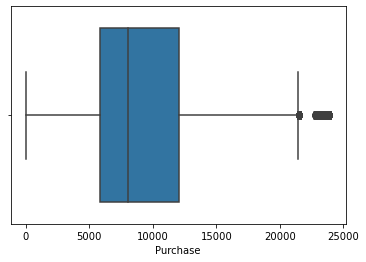

In [12]:
sns.boxplot(data=df_original, x='Purchase')

###### There are some outliers in the above dataset in the 'Purchase' column

In [13]:
## Dealing with the outliers

Q1 = np.percentile(df_original['Purchase'], 25)
Q3 = np.percentile(df_original['Purchase'], 75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = max(Q1 - 1.5*IQR, 0)

df_original = df_original[(df_original['Purchase'] <= upper_limit) & (df_original['Purchase'] >= lower_limit)]

In [14]:
df_original.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.473910e+05,547391,547391,547391,547391.0,547391,547391,547391.0,547391.0,547391.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,412171,218661,72040.0,230114,192845,323242.0,150933.0,NaN
mean,1.003028e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9195.627195
std,1.727357e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4938.872953
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5721.000000
50%,1.003075e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8038.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12019.000000


<AxesSubplot:xlabel='Purchase'>

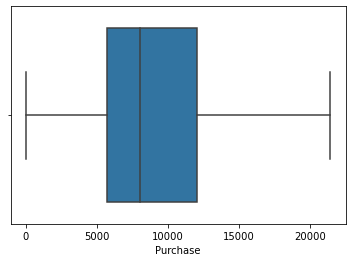

In [15]:
sns.boxplot(data=df_original, x='Purchase')

###### As we can see here we have removed all the outliers present in the 'Purchase ' column

## Univariate Analysis

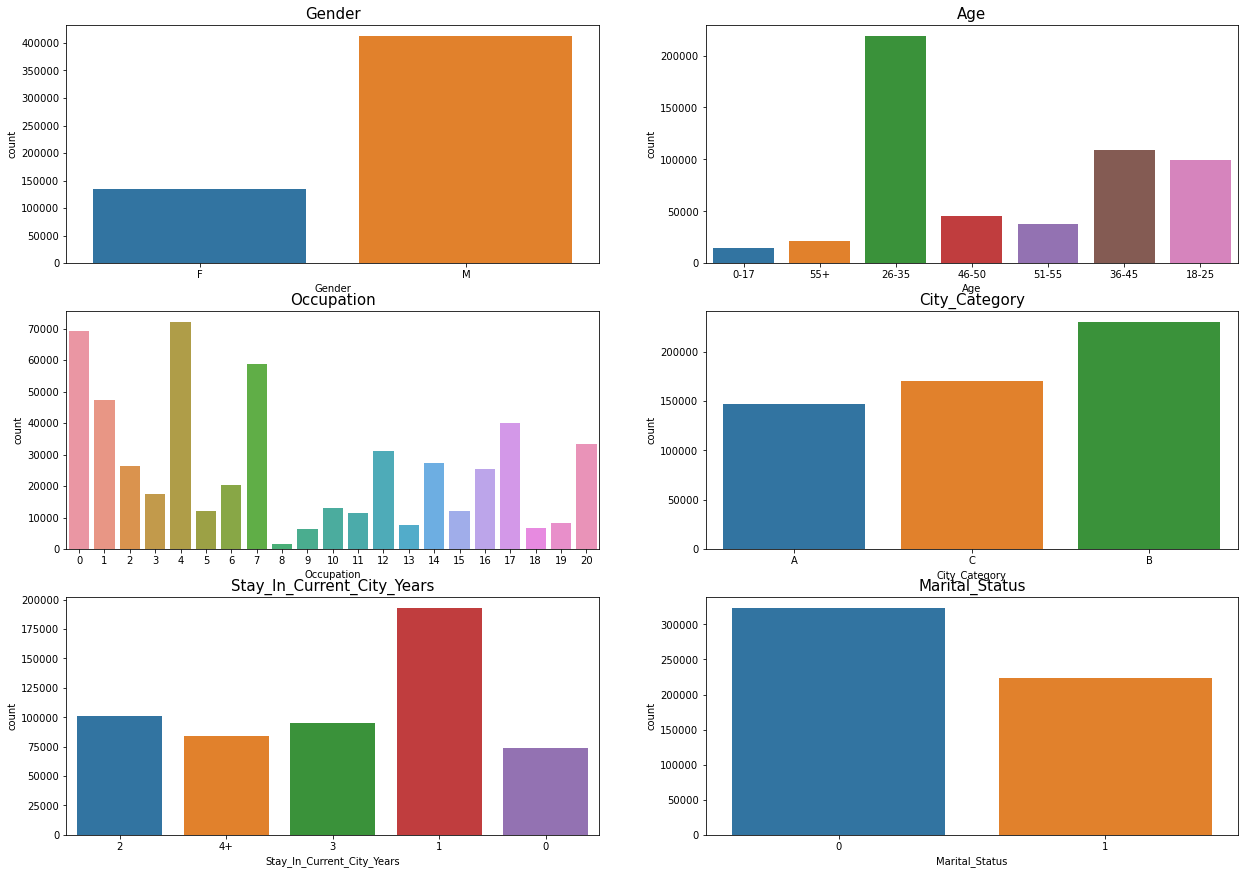

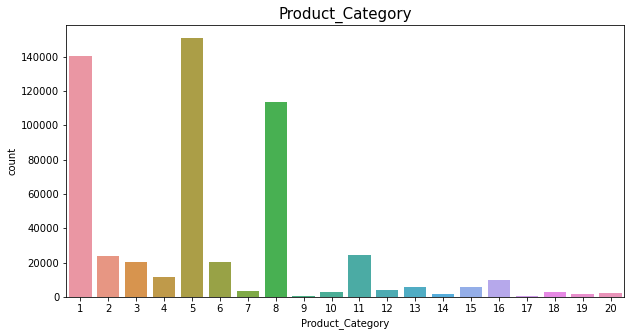

In [16]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(21,6))
fig.subplots_adjust(top=2)

sns.countplot(data=df_original, x='Gender', ax=axis[0,0]).set_title('Gender', fontsize=15)
sns.countplot(data=df_original, x='Age', ax=axis[0,1]).set_title('Age', fontsize=15)
sns.countplot(data=df_original, x='Occupation', ax=axis[1,0]).set_title('Occupation', fontsize=15)
sns.countplot(data=df_original, x='City_Category', ax=axis[1,1]).set_title('City_Category', fontsize=15)
sns.countplot(data=df_original, x='Stay_In_Current_City_Years', ax=axis[2,0]).set_title('Stay_In_Current_City_Years', fontsize=15)
sns.countplot(data=df_original, x='Marital_Status', ax=axis[2,1]).set_title('Marital_Status', fontsize=15)

plt.figure(figsize=(10,5))
sns.countplot(data=df_original, x='Product_Category').set_title('Product_Category', fontsize=15)

plt.show()

### Observations from above plots:

1. Most of the customers who purchased from Walmart on Black Friday are Male.
2. Customers who purchased the most are between the age 26 to 35.
3. 0,4,7 are the occupations of the customers who have purchased the most.
4. Most of the users belong to city category B.
5. Most of the customers are Single as compared to Married.
6. Customers who have stayed in the current city for 1 year have purchased the most compared to the rest of the customers.
7. Product categories 1,5 and 8 are the categories from which users have purchased the most and these categories have dominated the most among all the product categories.

## Bi-Variate Analysis

Text(0.5, 1.0, 'Marital_Status Vs Purchase')

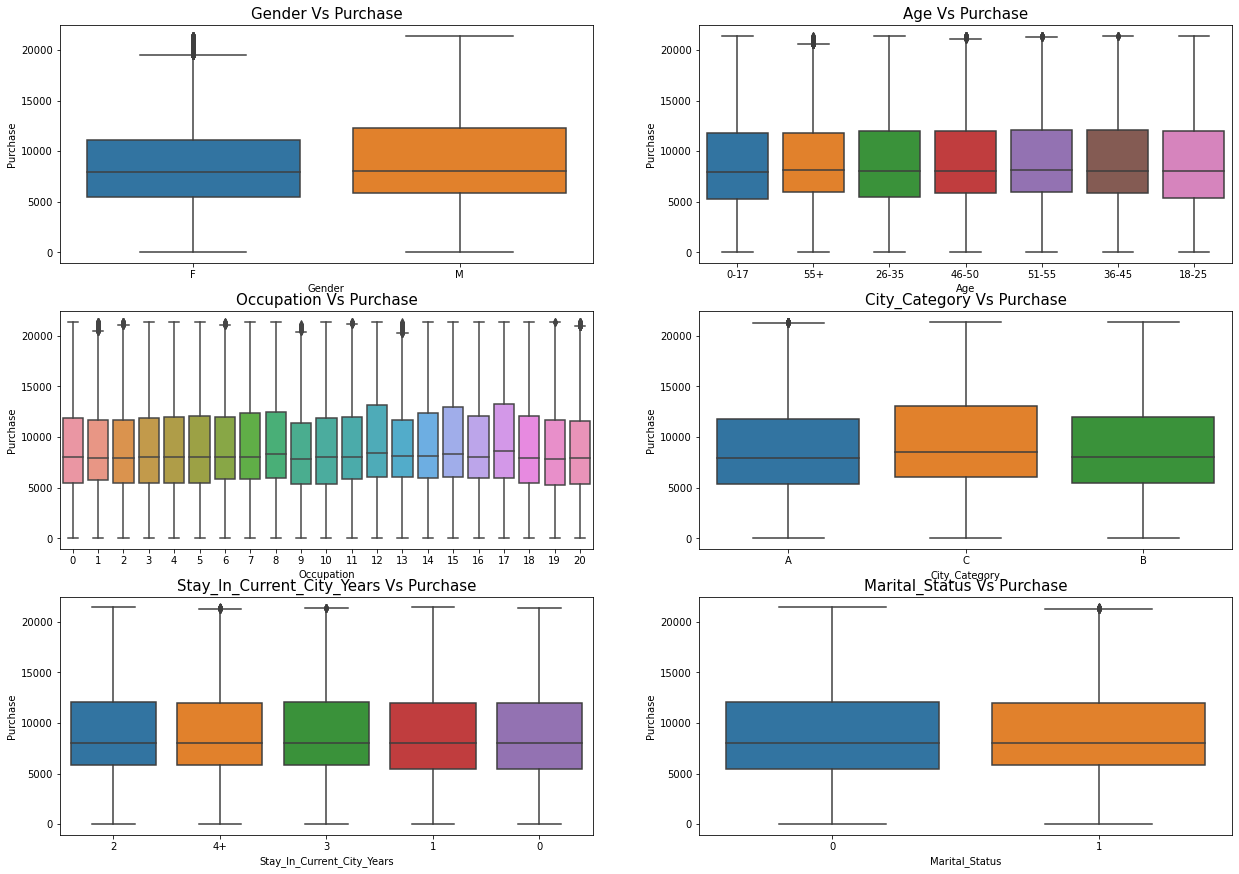

In [17]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(21,6))
fig.subplots_adjust(top=2)

sns.boxplot(data=df_original, x='Gender', y='Purchase', ax=axis[0,0]).set_title('Gender Vs Purchase', fontsize=15)
sns.boxplot(data=df_original, x='Age',y='Purchase', ax=axis[0,1]).set_title('Age Vs Purchase', fontsize=15)
sns.boxplot(data=df_original, x='Occupation',y='Purchase', ax=axis[1,0]).set_title('Occupation Vs Purchase', fontsize=15)
sns.boxplot(data=df_original, x='City_Category',y='Purchase', ax=axis[1,1]).set_title('City_Category Vs Purchase', fontsize=15)
sns.boxplot(data=df_original, x='Stay_In_Current_City_Years',y='Purchase', ax=axis[2,0]).set_title('Stay_In_Current_City_Years Vs Purchase', fontsize=15)
sns.boxplot(data=df_original, x='Marital_Status',y='Purchase', ax=axis[2,1]).set_title('Marital_Status Vs Purchase', fontsize=15)

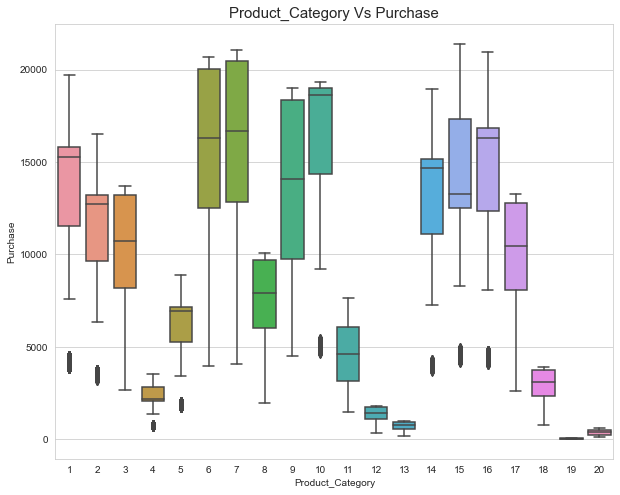

In [18]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_original, x='Product_Category', y='Purchase').set_title('Product_Category Vs Purchase', fontsize=15)
plt.show()

## Multi-Variate Analysis

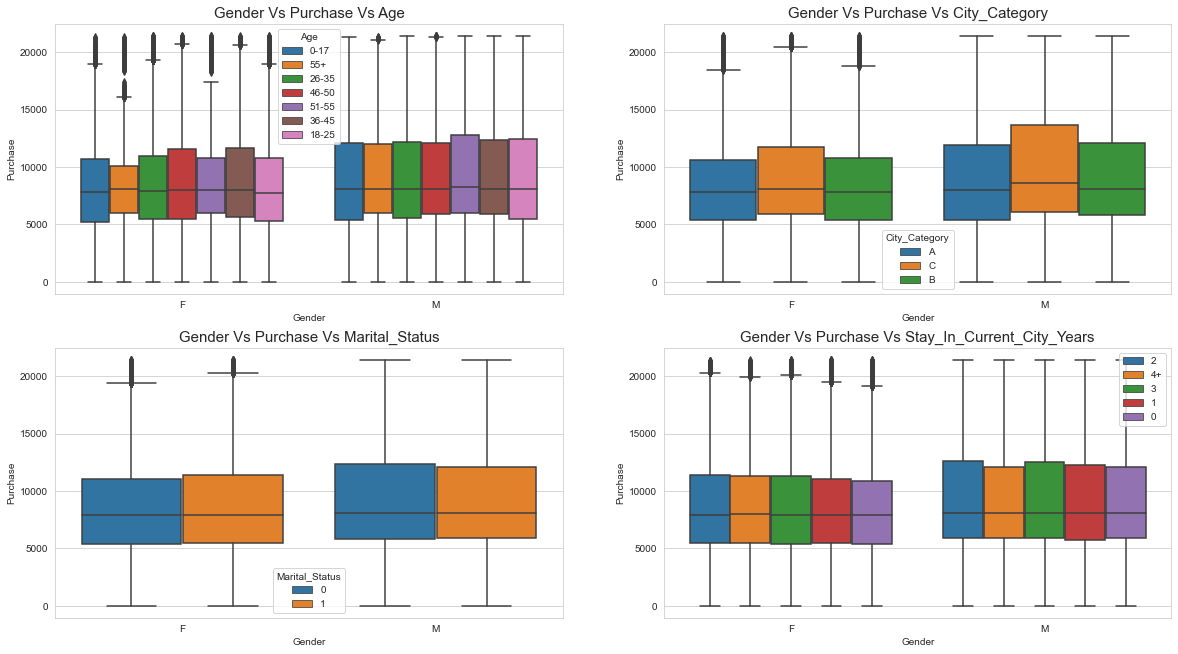

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df_original, y='Purchase', x='Gender', hue='Age', ax=axs[0,0]).set_title('Gender Vs Purchase Vs Age', fontsize=15)
sns.boxplot(data=df_original, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1]).set_title('Gender Vs Purchase Vs City_Category', fontsize=15)

sns.boxplot(data=df_original, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0]).set_title('Gender Vs Purchase Vs Marital_Status', fontsize=15)
sns.boxplot(data=df_original, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1]).set_title('Gender Vs Purchase Vs Stay_In_Current_City_Years', fontsize=15)
axs[1,1].legend(loc='upper right')

plt.show()

### CLT and Confidence Interval for Males and Females

In [20]:
df_user_avg = df_original.groupby(['User_ID', 'Gender'])[['Purchase']].mean().reset_index()
df_gender_avg = df_user_avg.groupby(['Gender'])[['Purchase']].mean().reset_index()
df_gender_avg

,Gender,Purchase
0,F,8897.335133
1,M,9725.283034


- Average amount spent by Female customers per trasaction is 8897
- Average amount spent by Male customers per transaction is 9725

In [21]:
df_amt = df_original.groupby(['User_ID', 'Gender'])[['Purchase']].mean().reset_index()
df_male = df_amt[df_amt['Gender'] == 'M']

df_female = df_amt[df_amt['Gender'] == 'F']

In [22]:
## Calculating the sample means for Males and Females from population data for CLT

sample_size_male = 4000
sample_size_female = 1500

male_means = []
female_means = []

for i in range(1000):
    male_sample_mean = df_male.sample(sample_size_male, replace=True)['Purchase'].mean()
    male_means.append(male_sample_mean)
    
    female_sample_mean = df_female.sample(sample_size_female, replace=True)['Purchase'].mean()
    female_means.append(female_sample_mean)

Text(0.5, 1.0, 'Female Sample Means Noramlly Distributed')

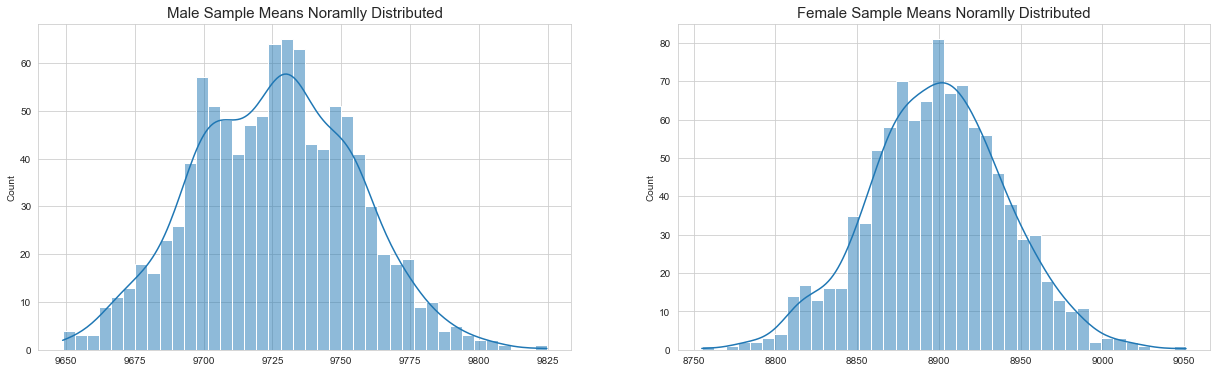

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21,6))

sns.histplot(x=male_means, bins=40,kde=True, ax=axes[0]).set_title('Male Sample Means Noramlly Distributed', fontsize=15)
sns.histplot(x=female_means,bins=40,kde=True, ax=axes[1]).set_title('Female Sample Means Noramlly Distributed', fontsize=15)

- Here according to the Central Limit Theorem we can see that the mean of the normally distributed sample means is approximatemly equal to the Population Mean.

In [24]:
print('According to the above plots we can define appproximate population mean as below:')
print(f'Population Mean for Males is approximately equal to {round(np.mean(male_means))} with standard deviation equal to {round(np.std(male_means))}')
print(f'Population Mean for Females is approximately equal to {round(np.mean(female_means))} with standard deviation equal to {round(np.std(female_means))}')

According to the above plots we can define appproximate population mean as below:
Population Mean for Males is approximately equal to 9726 with standard deviation equal to 29
Population Mean for Females is approximately equal to 8899 with standard deviation equal to 42


- Average amount spent by Males of the total population is 9724
- Average amount spent by Females of the total population is 8895

In [25]:
## Calculating the 95% Confidence Interval for males and females
## z-multiplier for 95% confidence interval will be +- 1.96

margin_of_error_for_males = 1.96*(np.std(df_male['Purchase'])) / np.sqrt(len(df_male))
male_sample_mean = np.mean(df_male['Purchase'])

lower_limit_male = male_sample_mean - margin_of_error_for_males
upper_limit_male = male_sample_mean + margin_of_error_for_males

print(f'95% Confidence Interval for Males: ({round(lower_limit_male,2)}, {round(upper_limit_male,2)})')


margin_of_error_for_females = 1.96*(np.std(df_female['Purchase'])) / np.sqrt(len(df_female))
female_sample_mean = np.mean(df_female['Purchase'])

lower_limit_female = female_sample_mean - margin_of_error_for_females
upper_limit_female = female_sample_mean + margin_of_error_for_females

print(f'95% Confidence Interval for Females: ({round(lower_limit_female,2)}, {round(upper_limit_female,2)})')

95% Confidence Interval for Males: (9668.83, 9781.74)
95% Confidence Interval for Females: (8817.52, 8977.15)


### CLT and Confidence Interval for Married and Unmarried

In [26]:
df_user_avg = df_original.groupby(['User_ID', 'Marital_Status'])[['Purchase']].mean().reset_index()
df_marital_status_avg = df_user_avg.groupby(['Marital_Status'])[['Purchase']].mean().reset_index()
df_marital_status_avg

,Marital_Status,Purchase
0,0,9492.96145
1,1,9488.61434


- Average amount spent by Unmarried customers per trasaction is 9492.96
- Average amount spent by Married customers per transaction is 9488.61

In [27]:
df_amt = df_original.groupby(['User_ID', 'Marital_Status'])[['Purchase']].mean().reset_index()
df_unmarried = df_amt[df_amt['Marital_Status'] == 0]

df_married = df_amt[df_amt['Marital_Status'] == 1]

In [28]:
## Calculating the sample means for Married and Unmarried from population data for CLT

sample_size_unmarried = 4000
sample_size_married = 1500

unmarried_means = []
married_means = []

for i in range(1000):
    unmarried_sample_mean = df_unmarried.sample(sample_size_unmarried, replace=True)['Purchase'].mean()
    unmarried_means.append(unmarried_sample_mean)
    
    married_sample_mean = df_married.sample(sample_size_married, replace=True)['Purchase'].mean()
    married_means.append(married_sample_mean)

Text(0.5, 1.0, 'Married Sample Means Noramlly Distributed')

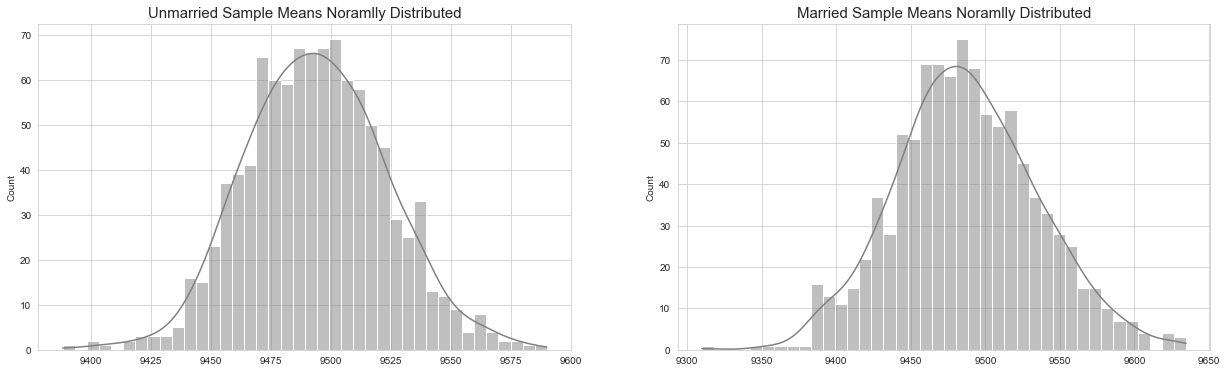

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21,6))

sns.histplot(x=unmarried_means, bins=40,kde=True,color='Grey', ax=axes[0]).set_title('Unmarried Sample Means Noramlly Distributed', fontsize=15)
sns.histplot(x=married_means,bins=40,kde=True,color='Grey', ax=axes[1]).set_title('Married Sample Means Noramlly Distributed', fontsize=15)

In [30]:
print('According to the above plots we can define appproximate population mean as below:')
print(f'Population Mean for Unmarried is approximately equal to {round(np.mean(unmarried_means))} with standard deviation equal to {round(np.std(unmarried_means))}')
print(f'Population Mean for Married is approximately equal to {round(np.mean(married_means))} with standard deviation equal to {round(np.std(married_means))}')

According to the above plots we can define appproximate population mean as below:
Population Mean for Unmarried is approximately equal to 9494 with standard deviation equal to 29
Population Mean for Married is approximately equal to 9487 with standard deviation equal to 48


- Average amount spent by Unmarried of the total population is 9493
- Average amount spent by Married of the total population is 9490

In [31]:
## Calculating the 95% Confidence Interval for Unmarried and Married
## z-multiplier for 95% confidence interval will be +- 1.96

margin_of_error_for_unmarried = 1.96*(np.std(df_unmarried['Purchase'])) / np.sqrt(len(df_unmarried))
unmarried_sample_mean = np.mean(df_unmarried['Purchase'])

lower_limit_unmarried = unmarried_sample_mean - margin_of_error_for_unmarried
upper_limit_unmarried = unmarried_sample_mean + margin_of_error_for_unmarried

print(f'95% Confidence Interval for Unmarried: ({round(lower_limit_unmarried,2)}, {round(upper_limit_unmarried,2)})')


margin_of_error_for_married = 1.96*(np.std(df_married['Purchase'])) / np.sqrt(len(df_married))
married_sample_mean = np.mean(df_married['Purchase'])

lower_limit_married = married_sample_mean - margin_of_error_for_married
upper_limit_married = married_sample_mean + margin_of_error_for_married

print(f'95% Confidence Interval for Married: ({round(lower_limit_married,2)}, {round(upper_limit_married,2)})')

95% Confidence Interval for Unmarried: (9431.15, 9554.77)
95% Confidence Interval for Married: (9415.07, 9562.16)


### CLT and Confidence Interval for Age

In [32]:
df_user_avg = df_original.groupby(['User_ID', 'Age'])[['Purchase']].mean().reset_index()
df_age_avg = df_user_avg.groupby(['Age'])[['Purchase']].mean().reset_index()
df_age_avg

,Age,Purchase
0,0-17,8942.370915
1,18-25,9469.294140
2,26-35,9539.216906
3,36-45,9595.455161
4,46-50,9468.310842
5,51-55,9512.064120
6,55+,9288.399137


In [33]:
df_user_avg['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [34]:
df_age_sum = df_original.groupby(['User_ID', 'Age'])[['Purchase']].mean().reset_index()
df_age_sum

,User_ID,Age,Purchase
0,1000001,0-17,9545.514286
1,1000002,55+,10525.610390
2,1000003,26-35,11780.517241
3,1000004,46-50,14747.714286
4,1000005,26-35,7745.292453
...,...,...,...
5886,1006036,26-35,7947.810547
5887,1006037,46-50,9056.396694
5888,1006038,55+,7502.833333
5889,1006039,46-50,7537.111111


In [35]:
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

age_dict = {}

for age_group in age_groups:
    age_dict[age_group] = []
    

sample_size = 150

for age_group in age_groups:
    for i in range(1000):
        age_sample_mean = df_age_sum[df_age_sum['Age'] == age_group]['Purchase'].sample(sample_size, replace=True).mean()
        age_dict[age_group].append(age_sample_mean)

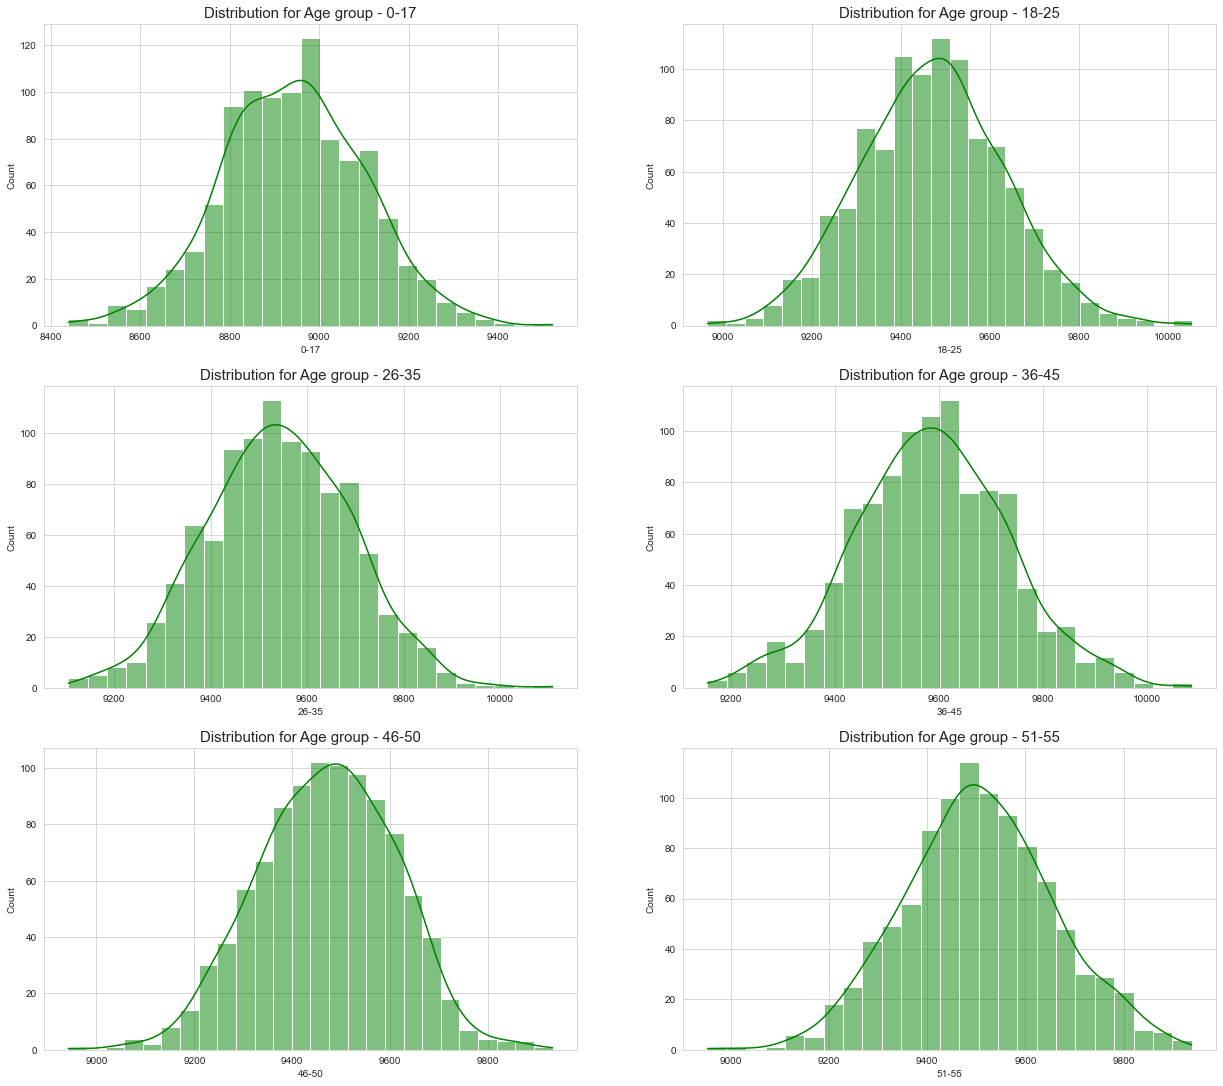

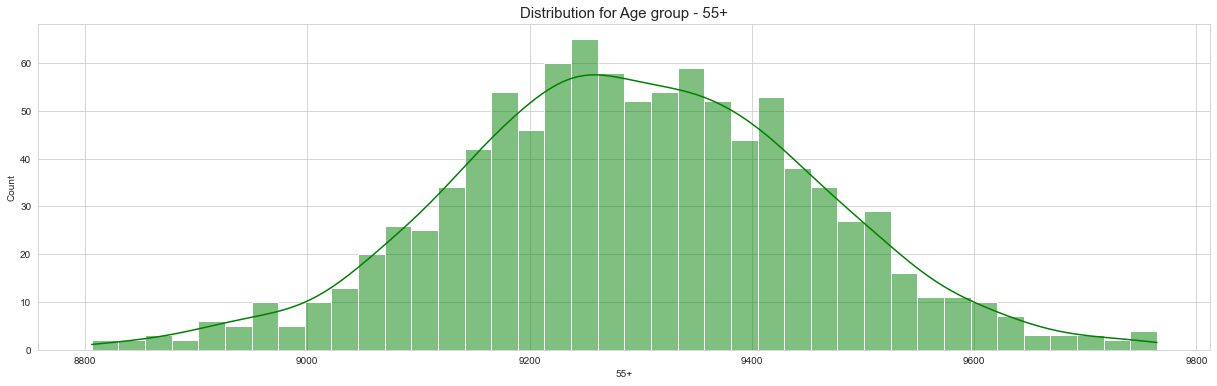

In [38]:
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
count=0
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(21,6))
fig.subplots_adjust(top=2.5)

for rows in range(3):
    for cols in range(2):
        sns.histplot(data=age_dict, x=age_groups[count], kde=True, ax=axis[rows, cols], color='Green').set_title(f'Distribution for Age group - {age_groups[count]}', fontsize=15)
        count += 1
        
plt.figure(figsize=(21,6))
sns.histplot(data=age_dict, x=age_groups[count], kde=True, color='Green', bins=40).set_title(f'Distribution for Age group - {age_groups[count]}', fontsize=15)
plt.show()

In [37]:
age_groups = age_dict.keys()

for i in age_groups:
    new_df = df_age_sum[df_age_sum['Age']==i] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print(f"95% confidence interval for customers with age group {i} is ({round(lower_lim,2)}, {round(upper_lim, 2)})")

95% confidence interval for customers with age group 0-17 is (8686.3, 9198.44)
95% confidence interval for customers with age group 18-25 is (9351.22, 9587.37)
95% confidence interval for customers with age group 26-35 is (9462.08, 9616.36)
95% confidence interval for customers with age group 36-45 is (9491.25, 9699.66)
95% confidence interval for customers with age group 46-50 is (9315.16, 9621.46)
95% confidence interval for customers with age group 51-55 is (9344.98, 9679.15)
95% confidence interval for customers with age group 55+ is (9090.17, 9486.63)


## Insights:

- Total of 20 product categories are there.
- Product categories 1,5 and 8 are the categories from which users have purchased the most and these categories have dominated the most among all the product categories.
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).
- Customers who purchased the most are between the age 26 to 35.
- Most of the customers who purchased from Walmart on Black Friday are Male. 75% of the users are Male and 25% are Female.
- Average amount spent by Female customers per trasaction is 8897.
- Average amount spent by Male customers per transaction is 9725.
- 60% of the customers are Single as compared to Married and 40% are Married.
- Customers who have stayed in the current city for 1 year have purchased the most compared to the rest of the customers. 35% staying in the city from 1 year, 18% from 2 years, 17% from 3 years.
- There are 20 differnent types of occupations in the city.
- Almost 40% of the users belong to city category B, followed by city category C with 35%  and the atlast A with 25%.
- Product Categories 6,7 and 10 are the categories which have highest average median purchased amount among the customers.


#### Confidence Interval  for Gender:

- 95% Confidence Interval for Males: (9668.83, 9781.74).
- 95% Confidence Interval for Females: (8817.52, 8977.15.

The population mean parameter for gender male and female will lie between the above given confidence interval.

#### Confidence Interval for Marital Status:

- 95% Confidence Interval for Unmarried: (9431.15, 9554.77).
- 95% Confidence Interval for Married: (9415.07, 9562.16).

The population mean parameter for unmarried and married customers will lie between the above given confidence interval.

#### Confidence Interval for Age Groups:
.
- 95% confidence interval for customers with age group 0-17 is (8686.3, 9198.44).
- 95% confidence interval for customers with age group 18-25 is (9351.22, 9587.37).
- 95% confidence interval for customers with age group 26-35 is (9462.08, 9616.36).
- 95% confidence interval for customers with age group 36-45 is (9491.25, 9699.66).
- 95% confidence interval for customers with age group 46-50 is (9315.16, 9621.46).
- 95% confidence interval for customers with age group 51-55 is (9344.98, 9679.15).
- 95% confidence interval for customers with age group 55+ is (9090.17, 9486.63).
..
The population mean parameter for all the age groups of the customers will lie between the above given confidence interval.

## Recommendations:

- As product categories 1,5 and 8 are the dominant categories with the highest purchasing frequencu among customers, Walmart should focus more on marketing of these categories and increasing the sales of these product categories.
- ALmost 80% of the total users are between the age of 18 to 50 years, so this should be the target audience for Walmart mainly focusing on age group 26-35 as customers with age between these range tend to buymore products.
- Most of the customers who have purchased from walmart on black friday are males and also the purchasing amount of males is higher than females, hence Walmart should focus on the product categories which are more relatable to Male gender.
- Unmarried customers prefer to buy more from Walmart than Married so the marketing strategy should be such that single customers should be able to relate to that product category which in return will boost the sales among single customers.
- Walmart should focus on the customers who belong to city category B as more number of customers belong to that city category. This category can become a target audience for walmart if they incerased the sales coming from this city category B.